In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline

## Looking for your most successful application

The purpose of the given project is the analysis of the market data and the elaboration of suggestions regarding the characteristics of mobile app profiles that are profitable for the App Store and Google Play markets and that will likely attract more users. Our aim is to enable developer's team to make data-driven decisions with respect to the kind of apps they build. The apps should be free to download and install, and the main source of revenue consists of in-app ads.

We will analyze existing data about applications developped for Android and iOS platform to determine the characteristics of an application that will attract a large number of users. To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we then develop it further.
* If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets.
### Summary of Results

In this project, we analyzed survey data from Android Market and AppStore to find  the characteristics of an application that may be successful on the both market. 
The only conclusion we reached is that the one of the free niches in which the application could fit is the category - Books and dictionaries. Considering the number of applications of this type and their popularity, a bilingual or trilingual English dictionary might be the right choice. 
As an alternative, the development of an application of the Quran may be proposed.

### 1. Opening and Exploring the Data
As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play. To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result. Two data sets that seem suitable for our purpose were found on the www.kaggle.com web page.

- A data set containing data about approximately ten thousand Android apps from Google Play. 
- A data set containing data about approximately seven thousand iOS apps from the App Store.

In [2]:
# Importing packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns

# The Google Play and Apple Store data sets
android = 'C:/Users/Sinch/Desktop/Guided project/googleplaystore.csv'
ios = 'C:/Users/Sinch/Desktop/Guided project/AppleStore.csv'

df_android = pd.read_csv(android)
df_ios = pd.read_csv(ios)

df_android = df_android.copy()
df_ios = df_ios.copy()

In [3]:
df_android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Column header description:
* App - Application name
* Category - Category the app belongs to
* Rating - Overall user rating of the app (as when scraped)
* Reviews - Number of user reviews for the app (as when scraped)
* Size - Size of the app (as when scraped)
* Installs - Number of user downloads/installs for the app (as when scraped)
* Type - Paid or Free
* Price - Price of the app (as when scraped)
* Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres - An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated - Date when the app was last updated on Play Store (as when scraped)
* Current Ver - Current version of the app available on Play Store (as when scraped)
* Android Ver - Min required Android version (as when scraped)


At a quick glance, the columns that might be useful for the purpose of our analysis are 'App', 'Size', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'.

In [4]:
df_ios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

Column header description:
* "id" : App ID
* "track_name": App Name
* "size_bytes": Size (in Bytes)
* "currency": Currency Type
* "price": Price amount
* "rating_count_tot": User Rating counts (for all version)
* "rating_count_ver": User Rating counts (for current version)
* "user_rating" : Average User Rating value (for all version)
* "user_rating_ver": Average User Rating value (for current version)
* "ver" : Latest version code
* "cont_rating": Content Rating
* "prime_genre": Primary Genre
* "sup_devices.num": Number of supporting devices
* "ipadSc_urls.num": Number of screenshots showed for display
* "lang.num": Number of supported languages
* "vpp_lic": Vpp Device Based Licensing Enabled

Columns that may be useful for the purpose of our analysis are 'track_name', 'size_bytes', 'rating_count_tot', 'price', and 'prime_genre'.

### 2. Cleaning and Preparing the Data

#### 2.1 Cleaning Android Data

In [5]:
# Drop the columns we won't use
df_android = df_android.drop(columns=['Android Ver',
                                      'Current Ver',
                                      'Last Updated'])

In [6]:
df_android.Rating.describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

The rating values cannot be more than 5, we will delete the rows with unrealistic data

In [7]:
# Get names of indexes for which column Rating has value > 5
index_names = df_android[df_android['Rating'] > 5].index

# Delete these row indexes from dataFrame
df_android.drop(index_names, inplace=True)

If we explore the Google Play data set long enough, we'll find that some apps have more than one entry.

In [8]:
# Search for duplicates making a bool series
bool_series = df_android["App"].duplicated()

# display data
df_android[bool_series]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping


In [9]:
# We have 1181 cases of dublicate values let's see some of them
df_android[df_android['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social


We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed two cells above for the Instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show that the data was collected at different times. We can use this to build a criterion for keeping rows. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

In [10]:
max_review = df_android.groupby(['App']).Reviews.transform(max)
df_android = df_android.loc[df_android.Reviews == max_review]

# There are however some duplicates with the same max number of reviews, we will also drop them
df_android.drop_duplicates(subset=['App'], inplace=True)

4:80: E501 line too long (95 > 79 characters)


At the end we will check and fix the data types for a clean analysis:

In [11]:
df_android.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [12]:
# Fixing Install values and turning them in to the float type
df_android['Installs'] = df_android['Installs'].str.replace(',', '')
df_android['Installs'] = df_android['Installs'].str.replace('+', '')
df_android['Installs'] = df_android['Installs'].astype(float)

In [13]:
# Fixing Size values and turning them in to the float type
df_android['Size'] = df_android['Size'].str.replace(',', '')
df_android['Size'] = df_android['Size'].str.replace('M', '')

We have both float and string values in the column and we will will try to leave the string in string format, for this reason we will convert only the numbers:

In [14]:
def clean_float(column):
    for value in column:
        try:
            float(value)
        except ValueError:
            pass


clean_float(df_android['Size'])

#### 2.2 Cleaning iOS Data

In [15]:
df_ios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [16]:
# Transforming the size column from bytes to MB
df_ios['size_Mbytes'] = df_ios['size_bytes'].div(1000000).round(2)

In [17]:
# Drop the columns we won't use
df_ios = df_ios.drop(columns=['id',
                              'currency',
                              'size_bytes',
                              'rating_count_ver',
                              'user_rating_ver',
                              'ver',
                              'cont_rating',
                              'sup_devices.num',
                              'ipadSc_urls.num',
                              'lang.num',
                              'vpp_lic'])

We will count the iOS app users exploring the 'rating_count_tot' column, for this reason we are not interested in the apps those have the rating count value equal to 0:

In [18]:
# Selecting apps with 'rating_count_tot' > 0
df_ios = df_ios.drop(df_ios[df_ios['rating_count_tot'] == 0].index)

#### 2.3 Cleaning non ASCII values

In [19]:
df_ios.tail()

,track_name,price,rating_count_tot,user_rating,prime_genre,size_Mbytes
6263,ナニワ金融道 全巻無料のマンガアプリ,0.00,1,4.0,Book,38.32
6264,There's no tablecloth I can't pull!!,0.00,1,4.0,Games,168.91
6265,"Tinkerblocks – code, create, play",1.99,1,1.0,Education,185.03
6266,Advent Magnificat Companion 2016,1.99,1,5.0,Book,53.12
6267,おかんからのメッセ - ほのぼの謎解きゲーム,0.00,1,5.0,Book,30.75


Exploring the data we have noticed that the names of some of the apps suggest they are not directed toward an English-speaking audience. Above, we see a couple of examples from both data sets.

We're not interested in keeping these kind of apps, so we'll remove them. One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.

Some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. We will check only the values that contains more as 3 non ASCII characters.

In [20]:
def is_english(string):
    non_ascii = 0

    for character in string:
        if ord(character) > 127:
            non_ascii += 1

    if non_ascii > 3:
        return np.NaN
    else:
        return string

Checking the Android and iOS Data for non ASCII app names:

In [21]:
df_ios['track_name'] = df_ios.track_name.apply(is_english)
df_android['App'] = df_android.App.apply(is_english)

In [22]:
# We have 1014 non ASCII values in iOS Dataset and 45 in Android Dataset
df_ios.isnull().sum()

track_name          368
price                 0
rating_count_tot      0
user_rating           0
prime_genre           0
size_Mbytes           0
dtype: int64

In [23]:
df_android.isnull().sum()

App                 45
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

In [24]:
df_ios = df_ios.dropna(subset=['track_name'])
df_android = df_android.dropna(subset=['App'])

In [25]:
df_ios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5900 entries, 0 to 6266
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        5900 non-null   object 
 1   price             5900 non-null   float64
 2   rating_count_tot  5900 non-null   int64  
 3   user_rating       5900 non-null   float64
 4   prime_genre       5900 non-null   object 
 5   size_Mbytes       5900 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 322.7+ KB


In [26]:
df_android.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9614 non-null   object 
 1   Category        9614 non-null   object 
 2   Rating          8166 non-null   float64
 3   Reviews         9614 non-null   object 
 4   Size            9614 non-null   object 
 5   Installs        9614 non-null   float64
 6   Type            9613 non-null   object 
 7   Price           9614 non-null   object 
 8   Content Rating  9614 non-null   object 
 9   Genres          9614 non-null   object 
dtypes: float64(2), object(8)
memory usage: 826.2+ KB


In [27]:
df_ios.user_rating.describe()

count    5900.000000
mean        4.052034
std         0.709503
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64

Our goal are the free apps for this reason we will delete all the non free apps rows

In [28]:
df_android.Type.describe()

count     9613
unique       2
top       Free
freq      8861
Name: Type, dtype: object

We are interested only in free apps:

In [29]:
# Selecting free Android apps
df_android = df_android.drop(df_android[df_android['Type'] != 'Free'].index)
# Selecting free iOS apps
df_ios = df_ios.drop(df_ios[df_ios['price'] != 0.0].index)

df_android.info()
df_ios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8861 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8861 non-null   object 
 1   Category        8861 non-null   object 
 2   Rating          7564 non-null   float64
 3   Reviews         8861 non-null   object 
 4   Size            8861 non-null   object 
 5   Installs        8861 non-null   float64
 6   Type            8861 non-null   object 
 7   Price           8861 non-null   object 
 8   Content Rating  8861 non-null   object 
 9   Genres          8861 non-null   object 
dtypes: float64(2), object(8)
memory usage: 761.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071 entries, 0 to 6264
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        3071 non-null   object 
 1   price             3071 non-null   float64
 2  

In [30]:
df_android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000.0,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference


In [31]:
df_ios

,track_name,price,rating_count_tot,user_rating,prime_genre,size_Mbytes
0,Facebook,0.0,2974676,3.5,Social Networking,389.88
1,Instagram,0.0,2161558,4.5,Photo & Video,113.95
2,Clash of Clans,0.0,2130805,4.5,Games,116.48
3,Temple Run,0.0,1724546,4.5,Games,65.92
4,Pandora - Music & Radio,0.0,1126879,4.0,Music,130.24
...,...,...,...,...,...,...
6235,Frantic Ball,0.0,1,5.0,Games,196.62
6240,LINE FIGHTERS,0.0,1,5.0,Games,136.36
6256,Trail Jump,0.0,1,4.0,Games,15.52
6261,Versus - Multiplayer Game (2 players),0.0,1,5.0,Games,60.76


### 3. Analysing Data

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. For instance, a profile that might work well for both markets might be a productivity app that makes use of gamification.
We will begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the *prime_genre* column of the App Store data set, and the Genres and *Category* columns of the Google Play data set.

In [32]:
android_pivot = pd.pivot_table(df_android,
                               index=['Category'],
                               values=['App'],
                               aggfunc='count')

percent_and = android_pivot.sort_values('App', ascending=False).reset_index()
percent_and['Percentage'] = percent_and['App'] / percent_and['App'].sum()
percent_and['Percentage'] = (percent_and['Percentage'] * 100).round(2)
percent_and = percent_and.rename(columns={'App': 'Total'})

percent_and.head()

,Category,Total,Percentage
0,FAMILY,1677,18.93
1,GAME,859,9.69
2,TOOLS,749,8.45
3,BUSINESS,407,4.59
4,LIFESTYLE,346,3.90


In [33]:
ios_pivot = pd.pivot_table(df_ios,
                           index=['prime_genre'],
                           values=['track_name'],
                           aggfunc='count')

percent_ios = ios_pivot.sort_values('track_name', ascending=False).reset_index()
percent_ios['Percentage'] = percent_ios['track_name'] / percent_ios['track_name'].sum()
percent_ios['Percentage'] = (percent_ios['Percentage'] * 100).round(2)
percent_ios = percent_ios.rename(columns={'track_name': 'Total',
                                          'prime_genre': 'Category'})

percent_ios.head()

,Category,Total,Percentage
0,Games,1798,58.55
1,Entertainment,245,7.98
2,Photo & Video,151,4.92
3,Education,111,3.61
4,Social Networking,101,3.29


6:80: E501 line too long (80 > 79 characters)
7:80: E501 line too long (87 > 79 characters)


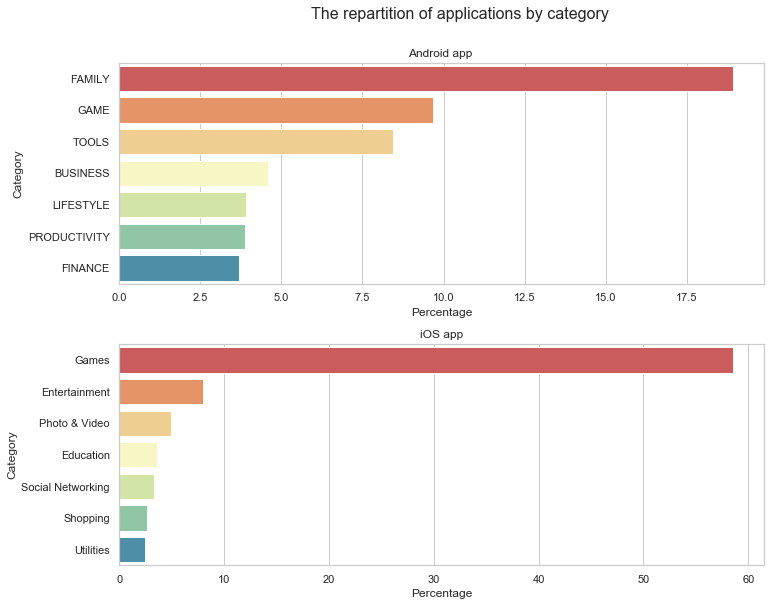

In [34]:
sns.set(style="whitegrid")

figure = plt.figure(2, figsize=(20, 8))
the_grid = figure.add_gridspec(2, 2)

plt.subplot(the_grid[0, 1],  title='Android app ')
sns.barplot(x='Percentage',
            y='Category',
            data=percent_and.head(7),
            palette='Spectral')

plt.subplot(the_grid[1, -1], title='iOS app')
sns.barplot(x='Percentage',
            y='Category',
            data=percent_ios.head(7),
            palette='Spectral')

plt.suptitle('The repartition of applications by category',
             x=0.78,
             y=1.05,
             fontsize=16)

plt.tight_layout()

For the App Store we can notice that among the free English apps, a good part of them (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The situation on Google Play is completely different - there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However the market is dominated (29%) by Family (the biggest part of this category consist from games for kids also actually there are more kid's games as family apps) and Games categories.
 
* The English speaking App Store is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the great number of fun apps those are the most numerous doesn't mean that they are the most popular, we will try to check this supposition later.

* The situation on Google Play is more balanced, the market being dominated by applications such as family and games, but besides these almost 17% of the market are occupied by applications such as Tools, Business and Lifestyle and this niche can be very interesting.




#### 3.1 Most Popular Apps by Genre on Apple Store

For the Google Play data set, we have used the information in the Installs column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the *rating_count_tot* column

,rating_count_tot
prime_genre,
Navigation,86090.333333
Reference,84309.875000
Social Networking,75090.346535
Weather,58553.480000
Music,58208.476923
Book,55661.900000
Food & Drink,33333.923077
Finance,33319.000000
Travel,30533.837838


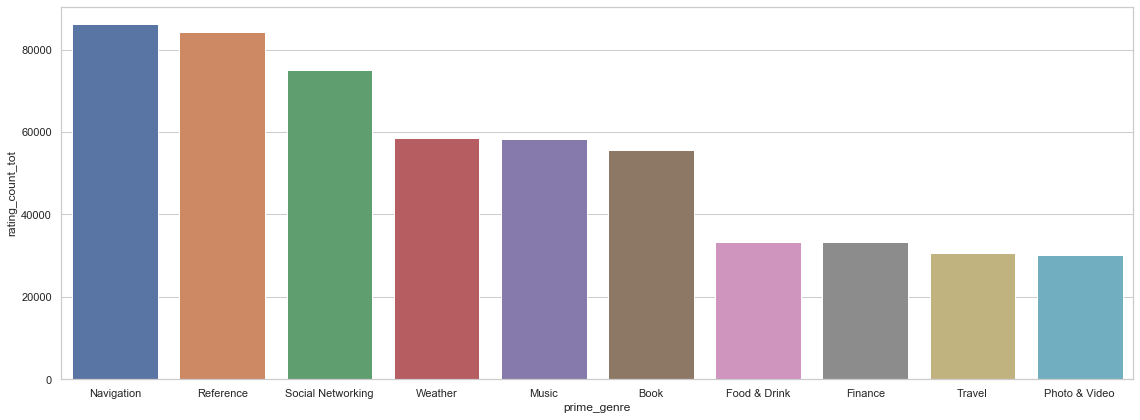

In [35]:
ios_pivot = pd.pivot_table(df_ios, index=['prime_genre'],
                           values=['rating_count_tot'],
                           aggfunc=np.mean)

ios_pivot = ios_pivot.sort_values('rating_count_tot', ascending=False).head(10)

plt.figure(figsize=(16, 6))
sns.barplot(x=ios_pivot.index, y='rating_count_tot', data=ios_pivot)
plt.tight_layout()

On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together. The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

In [36]:
df_ios[df_ios['prime_genre'] == 'Navigation'].sort_values(by='rating_count_tot',
                                                          ascending=False).head(5)

,track_name,price,rating_count_tot,user_rating,prime_genre,size_Mbytes
49,"Waze - GPS Navigation, Maps & Real-time Traffic",0.0,345046,4.5,Navigation,94.14
130,Google Maps - Navigation & Transit,0.0,154911,4.5,Navigation,120.23
881,Geocaching®,0.0,12811,3.5,Navigation,108.17
1633,CoPilot GPS – Car Navigation & Offline Maps,0.0,3582,4.0,Navigation,82.53
3987,ImmobilienScout24: Real Estate Search in Germany,0.0,187,3.5,Navigation,126.87


1:80: E501 line too long (80 > 79 characters)
2:80: E501 line too long (82 > 79 characters)


Reference apps have 86 090 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [37]:
df_ios[df_ios['prime_genre'] == 'Reference'].sort_values(by='rating_count_tot',
                                                         ascending=False).head(10)

,track_name,price,rating_count_tot,user_rating,prime_genre,size_Mbytes
6,Bible,0.0,985920,4.5,Reference,92.77
90,Dictionary.com Dictionary & Thesaurus,0.0,200047,4.0,Reference,111.28
335,Dictionary.com Dictionary & Thesaurus for iPad,0.0,54175,4.5,Reference,165.75
551,Google Translate,0.0,26786,3.5,Reference,65.28
715,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",0.0,18418,4.5,Reference,100.55
738,New Furniture Mods - Pocket Wiki & Game Tools ...,0.0,17588,4.5,Reference,52.96
757,Merriam-Webster Dictionary,0.0,16849,4.5,Reference,155.59
913,Night Sky,0.0,12122,4.5,Reference,596.50
1106,City Maps for Minecraft PE - The Best Maps for...,0.0,8535,4.0,Reference,90.12
1451,LUCKY BLOCK MOD ™ for Minecraft PC Edition - T...,0.0,4693,4.0,Reference,86.87


2:80: E501 line too long (82 > 79 characters)


However, this niche seems to show some potential and developing a Dictionary or a Bible App can be a good idea. This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us.

* Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.
* Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.
* Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

#### 3.2 Most Popular Apps by Genre and Category on Google Play

Let's have a look which are the most popular apps in a couple of categories, we will try to analyze the number of installations:

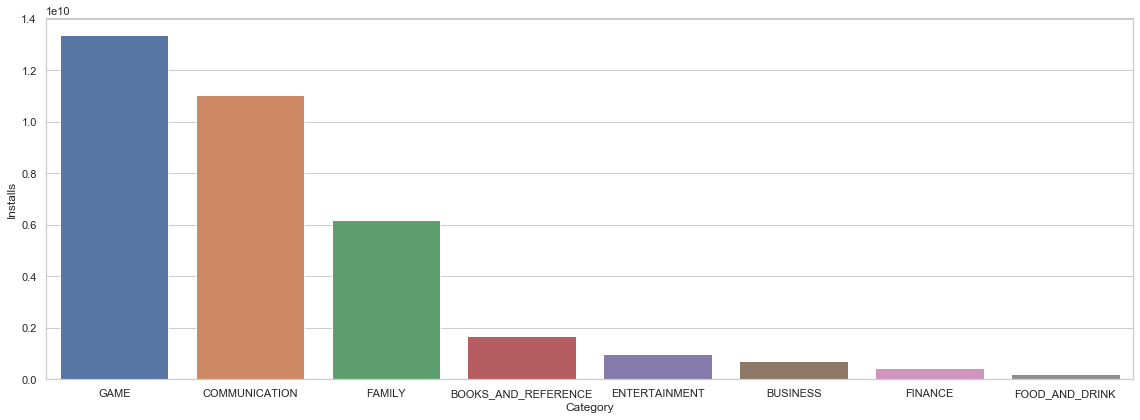

In [38]:
android_pivot = pd.pivot_table(df_android, index=['Category'],
                               values=['Installs'], aggfunc=np.sum).head(15)

android_pivot = android_pivot.sort_values('Installs', ascending=False).head(8)

plt.figure(figsize=(16, 6))
sns.barplot(x=android_pivot.index, y='Installs', data=android_pivot)
plt.tight_layout()

Let's dive inside the most popular categories:

In [39]:
df_android[df_android['Category'] == 'FAMILY'].sort_values(by='Installs',
                                                           ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1.000000e+09,Free,0,Teen,Entertainment
6849,Bubble Witch 2 Saga,FAMILY,4.3,2838064,Varies with device,1.000000e+08,Free,0,Everyone,Casual
4111,Talking Tom Cat 2,FAMILY,4.3,3213548,55,1.000000e+08,Free,0,Everyone 10+,Entertainment
4247,Talking Tom Cat,FAMILY,4.3,1838090,Varies with device,1.000000e+08,Free,0,Everyone 10+,Casual
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71,1.000000e+08,Free,0,Everyone,Casual


2:80: E501 line too long (83 > 79 characters)


In [40]:
df_android[df_android['Category'] == 'GAME'].sort_values('Installs',
                                                         ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1872,Subway Surfers,GAME,4.5,27725352,76,1.000000e+09,Free,0,Everyone 10+,Arcade
1908,My Talking Tom,GAME,4.5,14892469,Varies with device,5.000000e+08,Free,0,Everyone,Casual
1869,Candy Crush Saga,GAME,4.4,22430188,74,5.000000e+08,Free,0,Everyone,Casual
1920,Temple Run 2,GAME,4.3,8119154,62,5.000000e+08,Free,0,Everyone,Action
1885,Pou,GAME,4.3,10486018,24,5.000000e+08,Free,0,Everyone,Casual


2:80: E501 line too long (81 > 79 characters)


In [41]:
df_android[df_android['Category'] == 'COMMUNICATION'].sort_values('Installs',
                                                                  ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0,Everyone,Communication
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1.000000e+09,Free,0,Everyone,Communication
464,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1.000000e+09,Free,0,Everyone,Communication
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1.000000e+09,Free,0,Everyone,Communication
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1.000000e+09,Free,0,Everyone,Communication


2:80: E501 line too long (90 > 79 characters)


In [42]:
df_android[df_android['Category'] == 'BOOKS_AND_REFERENCE'].sort_values('Installs', ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference
5651,Audiobooks from Audible,BOOKS_AND_REFERENCE,4.5,568922,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference
3941,Bible,BOOKS_AND_REFERENCE,4.7,2440695,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference
4083,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference


1:80: E501 line too long (108 > 79 characters)



Let's try to analyze the picture more broadly, we will combine genres and categories:

In [43]:
android_pivot = pd.pivot_table(df_android, index=['Category', 'Genres'],
                               values=['Installs'], aggfunc=np.sum).head(15)

android_pivot.sort_values('Installs', ascending=False)
android_pivot

Installs
Category            Genres                               
ART_AND_DESIGN      Art & Design             1.125111e+08
                    Art & Design;Creativity  7.100000e+05
AUTO_AND_VEHICLES   Auto & Vehicles          5.308006e+07
BEAUTY              Beauty                   2.719705e+07
BOOKS_AND_REFERENCE Books & Reference        1.665884e+09
BUSINESS            Business                 6.969021e+08
COMICS              Comics                   4.492115e+07
                    Comics;Creativity        5.000000e+04
COMMUNICATION       Communication            1.103691e+10
DATING              Dating                   1.409148e+08
EDUCATION           Education                1.547500e+08
                    Education;Brain Games    6.000000e+06
                    Education;Creativity     6.000000e+06
                    Education;Education      2.160000e+07
                    Education;Pretend Play   1.000000e+06

On average, communication apps are very popular. Theirs number is heavily skewed up by the giants like WhatsApp, Facebook, Messenger, Skype, Google Chrome, Gmail, and Hangouts that have over one billion installs.

The market is also dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have strong players like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.). We will try to find a niche that it is not so dominated by strong players who are hard to compete against. The game genre seems pretty popular, but 29% of the total apps on the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre seems to be popular as well, with 1.665884e+09 installs. It can be an interesting niche for us, let's try to analyze it more deeply.

The age category seems not very differentiate, that means that the future app should be developed for a non-age limited auditory.

In [44]:
android_pivot = pd.pivot_table(df_android[df_android['Category'] == 'BOOKS_AND_REFERENCE'],
                               index=['Category', 'Content Rating'],
                               values=['Installs'],
                               aggfunc=np.sum)
android_pivot

Installs
Category            Content Rating              
BOOKS_AND_REFERENCE Everyone        2.156683e+08
                    Everyone 10+    1.111000e+07
                    Mature 17+      5.501000e+06
                    Teen            1.433605e+09

1:80: E501 line too long (91 > 79 characters)


The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average.
However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity with more than 500 000 downloads:

In [45]:
df_android_cat = df_android[df_android['Category'] == 'BOOKS_AND_REFERENCE'].sort_values('Installs', ascending=False)
df_android_cat = df_android_cat[df_android_cat['Installs'] >= 500000]
df_android_cat

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference
5651,Audiobooks from Audible,BOOKS_AND_REFERENCE,4.5,568922,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference
3941,Bible,BOOKS_AND_REFERENCE,4.7,2440695,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference
4083,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference
...,...,...,...,...,...,...,...,...,...,...
9349,SDA Sabbath School Quarterly,BOOKS_AND_REFERENCE,4.7,14773,6.4,5.000000e+05,Free,0,Everyone,Books & Reference
178,"Only 30 days in English, the guideline is guar...",BOOKS_AND_REFERENCE,4.6,1065,2.3,5.000000e+05,Free,0,Everyone,Books & Reference
6509,NOOK App for NOOK Devices,BOOKS_AND_REFERENCE,4.7,19090,Varies with device,5.000000e+05,Free,0,Everyone,Books & Reference
184,Azpen eReader,BOOKS_AND_REFERENCE,3.5,156,42,5.000000e+05,Free,0,Everyone,Books & Reference


1:80: E501 line too long (117 > 79 characters)


Let's search among the 69 applications which kind of apps do we have there. This niche seems to be dominated by electronic readers and dictionaries, so it will be probably to compete developing a similar app. 

In [46]:
import re
patterns = ['Dict', 'Book', 'Tutorial', 'Audio', 'Bible', 'Quran']

patterns_lower = '|'.join([s.lower() for s in patterns])
df_android_cat['App'].str.lower().str.extract(rf"({patterns_lower})",
                                              expand=False).value_counts()

book     16
dict     14
quran     9
audio     2
bible     2
Name: App, dtype: int64

However we can notice that the mos of the dictionaries are English or English-Hindi. It seems that developing an English bilingual dictionary could be profitable for both the Google Play and the App Store markets.

Let's have a look on the the TOP most important languages in the world in the 21st century:

<img src='https://www.daytranslations.com/blog/wp-content/uploads/2017/07/What-Are-The-Most-Important-Languages-of-The-21st-Century.jpg' width='600' height='600' />

As we see the most popular languages of the 21st century are English, Chinese, German and Spanish, therefore a bilingual English-German or trilingual English-German-Chinese dictionary could be a successful choice.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

In order to diversify the developed application from the competing apps it is necessary to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

### Conclusion

In this project, we analyzed survey data from Android Market and AppStore to find  the characteristics of an application that may be successful on the both market. 
The only conclusion we reached is that the one of the free niches in which the application could fit is the category - Books and dictionaries. Considering the number of applications of this type and their popularity, a bilingual or trilingual English dictionary might be the right choice. 
As an alternative, the development of an application of the Quran may be proposed.